In [27]:
%pip install minisom

# Import required libraries
import math
from minisom import MiniSom
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import pandas as pd  # loading data in table form
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation
import matplotlib.gridspec as gridspec
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize  # machine learning algorithm library
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import svm


# Library settings
pd.set_option('display.max_columns', 60)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **A. Opis zbiorów danych.**

**Covertype Data Set**

Typ atrybutów: Kategoryczny, Integer. <br>
Liczba atrybutów: 54 <br>
Zgubione wartości: 0 <br>
Rodzaj danych: Dyskretne <br>

Zbiór danych służy do przewidywania typu pokrycia leśnego na podstawie następujących atrybutów:
*   Wysokość
*   Wygląd/Aspekt
*   Nachylenie
*   Pozioma odległość od wody
*   Pionowa odległość od wody
*   Pozioma odległość od jezdni
*   Zacienienie o 9:00
*   Zacienienie o 12:00
*   Zacienienie o 15:00
*   Pozioma odległość do punktów zapłonu
*   Dziekie tereny (4 binarne kolumny)
*   Typy ziemii (40 binarnych kolumn)
*   7 typów pokrycia leśnego

Dane są w postaci surowej, nie były skalowane.
Wszystkie dane zostały uzyskane od instytucji znajdujących się w USA i dotyczą czterech obszarów dzikiej przyrody znajdujących się w Roosevelt National Forest w północnym Kolorado. Obszary te zostały wybrane ze względu na to, że nie znajdziemy tam dużej ingerencji człowieka, zatem wygląd tych terenów i typy pokrycia leśnego są wynikiem przemian naturalnych.

Najlepsze i najbardziej typowe dla całego zbiory danych są obszary Rawah oraz Comanche Peak, ponieważ posiadają wiele gatunków drzew i lepszy zakres wartości zmiennych predykcyjnych takich jak np. wyokość. Skłąd gatunkowy pozostałych dwóch obszarów jest nieco bardziej ubogi.

<br>
<br>

**Credit Approval Data Set**

Typ atrybutów: Kategoryczny, Continuous, Integer. <br>
Liczba atrybutów: 15 <br>
Liczba instancji: 690 <br>
Zgubione wartości: występują <br>
Rodzaj danych: Mieszane <br>

Zbiór danych służy do rozpatrywania wniosków o karty kredytowe na podstawie następujących atrybutów:

* A1: b, a. 
* A2: continuous. 
* A3: continuous. 
* A4: u, y, l, t. 
* A5: g, p, gg. 
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
* A7: v, h, bb, j, n, z, dd, ff, o. 
* A8: continuous. 
* A9: t, f. 
* A10: t, f. 
* A11: continuous. 
* A12: t, f. 
* A13: g, p, s. 
* A14: continuous. 
* A15: continuous. 
* A16: +,- (class attribute)

Nazwy i wartości wszystkich atrybutów zostały zmienione na nic nieznaczące symbole w celu ochrony poufności danych. W zbiorze danych znajdują się atrybuty kategoryczne, ciągłe oraz typu całkowitego o dużych i małych wartościach. Zbiór danych powstał w calach klasyfikacyjnych i posiada 15 atrybutów z 690 instancjami w którym występują brakujące dane.


# **Wczytywanie zbiorów danych**

In [ ]:
#  Load dataset 1
print("Dataset 1 - forest covertype:\n")
covtype_colnames = ['Elevation', 'Aspect', 'Slope', 'Dist_to_water_hor', 'Dist_to_water_ver', 'Hillshade_9am', 'Hillshade_Noon',
                    'Hillshade_3pm', 'Dist_to_fire', ] + [f'Wilderness_{i}' for i in range(4)] + [f'Soil_{i}' for i in range(40)] + ['Cover_Type']
covtype_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz",
                              compression='gzip', header=None, names=covtype_colnames)
covtype_dataset.head()

Dataset 1 - forest covertype:



,Elevation,Aspect,Slope,Dist_to_water_hor,Dist_to_water_ver,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Dist_to_fire,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3,Soil_0,Soil_1,Soil_2,Soil_3,Soil_4,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Soil_10,Soil_11,Soil_12,Soil_13,Soil_14,Soil_15,Soil_16,Soil_17,Soil_18,Soil_19,Soil_20,Soil_21,Soil_22,Soil_23,Soil_24,Soil_25,Soil_26,Soil_27,Soil_28,Soil_29,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
#  Load dataset 2
credit_colnames = [f'A{i}' for i in range(1,17)]
credit_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",header=None, names=credit_colnames)
print("Dataset 2 - credit screening:\n")
credit_dataset.head()

Dataset 2 - credit screening:



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# **Wizualizacja danych**

1)

Oś pionowa: pionowa odległość od wody

Oś pozioma: pozioma odległość od wody

Z pierwszego wykresu wynika że gleby w znacznym stopniu zmieniają się ze względu na poziomą odłegość od wody. Zmieniają się one także wraz ze wzrostem odległości pionowej od wody jednak wciąż różne typy gleby występują na znacznych odległościach pionowych. Natomiast na wyższych odległościach poziomych przechodzą one w inny typ gleby.

2)

Oś pionowa: odległość od punktów ogniowych

Oś pozioma: Wysokość

Większe znaczenie w tym wypadku ma odległość od punktów ogniowych. Na wykresie drugim widać że na różnych wysokościach wciąż występują te same typy gleb. Zmieniają się one wraz ze wzrostem odległości od punktów ogniowych. Dla niskich wartości tego parametru jesteśmy w stanie przewidzieć że gleba będzie typu 5, 6, 4, 3 lub 7. Dla wyższych wartości natomiast przeważają typy gleb o numerach 1 oraz 2.

3)

Oś pionowa: nachylenie

Oś pozioma: zacienienie obszaru w południe

Na tym wykresie możemy zaobserwować jak typ gleby zależy od poziomu zacienienia w południe. Wraz ze wzrostem zacienienia typ gleby się zmienia. Na początku są to gleby typu 2, które następnie przechodzą w gleby typu 1, 3, 6 i 7. Oczywiście wciąż występuję gleby typu 2 czy 4 jednak w porównaniu do pozostałych typów są one w mniejszości.

4)

Oś pionowa: zacienienie o 15:00

Oś pozioma: zacienienie o 9:00

Tym razem możemy obserwować zmiany typu gleby w związku ze wzrostem zacienienia o godzinie 15:00 oraz 9:00. Widzimy że wraz ze wzrostem zacienienia o konkretnych godzinach zmieniają się typy gleb poczawszy od wymieszanych ze sobą typów 1 i 2, a kończąc na typie 7.

Z 4 przygotowanych wykresów wynika że w znacznym stopniu w przewidywaniach będą przeważać typy 2 oraz 7 podczas gdy pozostałych typów gleb będzie mniej, natomiast typ 4 występuje w bardzo małych ilościach.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

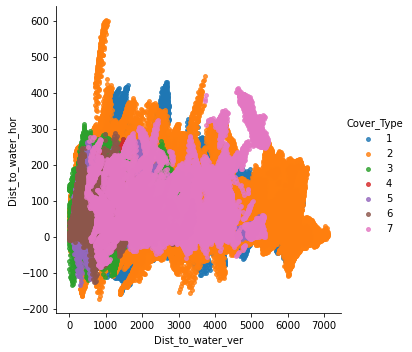

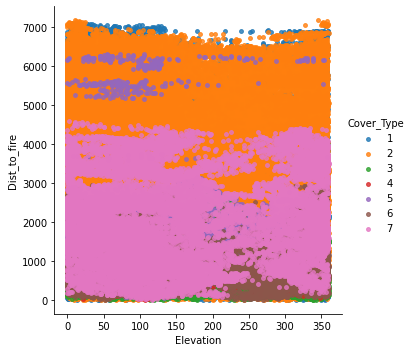

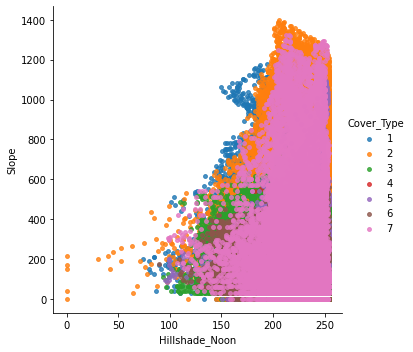

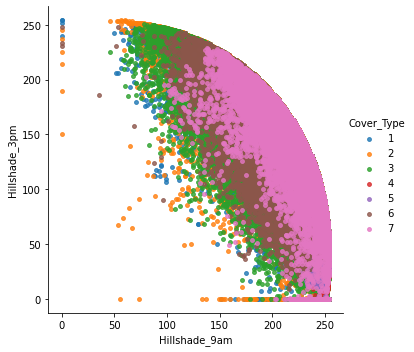

In [5]:
sns.lmplot('Dist_to_water_ver', 'Dist_to_water_hor',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Elevation', 'Dist_to_fire',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Hillshade_Noon', 'Slope',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

sns.lmplot('Hillshade_9am', 'Hillshade_3pm',
           data=covtype_dataset,
           fit_reg=False,
           hue="Cover_Type",
           scatter_kws={"marker": "D",
                        "s": 15})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

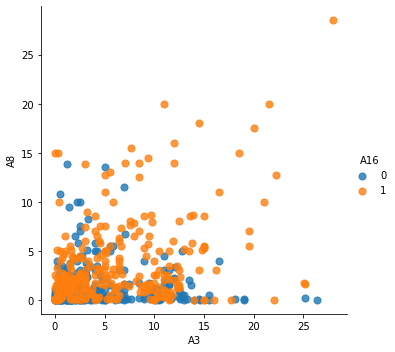

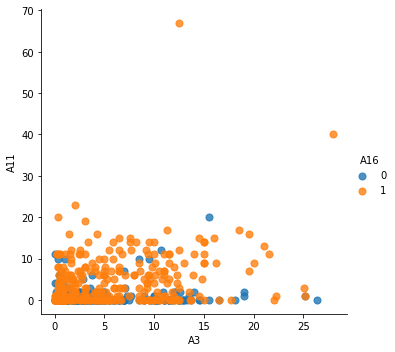

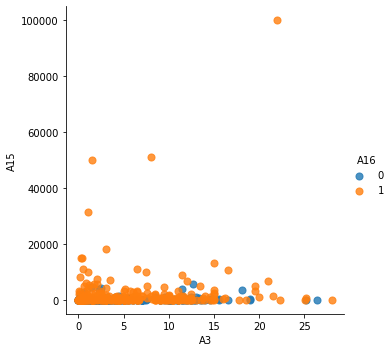

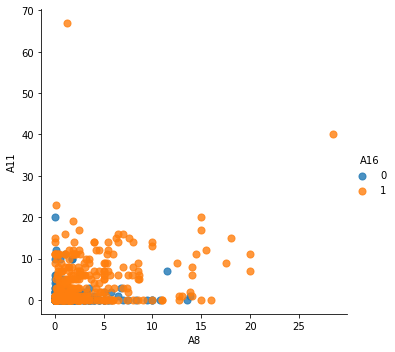

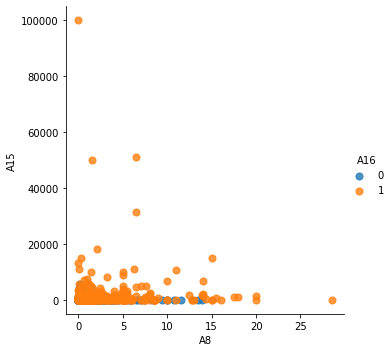

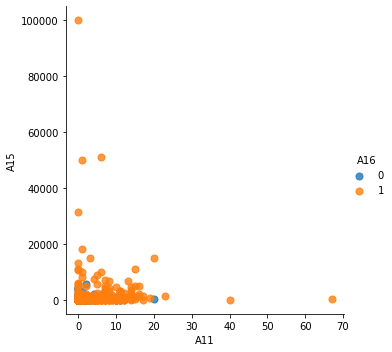

In [ ]:
A = ['A3', 'A8', 'A11', 'A15']
for i in range(len(A)):
    for j in range(len(A)):
        if i >= j:
            pass
        else:
            sns.lmplot(A[i], A[j],
                    data=credit_dataset,
                    fit_reg=False,
                    hue="A16",
                    scatter_kws={"marker": "D",
                                    "s": 50})

# **B. Przygotowanie danych.**

Przygotowanie danych dotyczące zbioru danych covtype. Podział na zbiór treningowy i zbiór testowy. Na początku zastąpiliśmy 7 za pomocą 0, aby ułatwić dalsze działania. Następnie podzieliliśmy dane na konkretne wartości oraz ich tabele. Teraz możemy rozdzielić zbiór danych na zbiory testowy oraz zbiór którego użyjemy do trenowania. Wspólnie zdecydowaliśmy, że podobnie jak w przypadku zbioru dotyczącego irysów podzielimy nasz zbiór covtype losowo aby uzyskać bardziej zróżnicowane wyniki. Dodatkowo nasz zbiór, którego użylismy do przetestowania naszej sieci jest wielkości 20% zbioru początkowego. Na koniec przetransmofrmowaliśmy nasze tabele do jednego wektora, aby kolejny raz ułatwić sobie pracę.


In [3]:
# replace 7 with 0 to transform covtypes from 1-7 to 0-6
covtype_dataset.loc[covtype_dataset["Cover_Type"] == 7, "Cover_Type"] = 0

# split into data and labels
covtype_X = covtype_dataset.iloc[:, 0:-1].values
covtype_y = covtype_dataset.iloc[:, -1].values
covtype_X = normalize(covtype_X, axis=0)

# split into test set and training set
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X, covtype_y, test_size=0.20, random_state=31)

# transform labels to OHE
covtype_y_train = np_utils.to_categorical(covtype_y_train, num_classes=7)
covtype_y_test = np_utils.to_categorical(covtype_y_test, num_classes=7)

Przygotowanie danych dotyczące zbioru danych credit approval. Nasze przygotowywanie danych dla drugiego zbioru danych rozpoczęliśmy od usunięcia brakujących wartości, aby nasz drugi zbiór był bardziej kompletny. Następnie podzieliliśmy dane na dane numeryczne i kategoryczne. Ten podział był konieczny, aby następnie możliwa była zamiana danych kategorycznych na 0 lub 1 w zależności od nich samych. Dzięki takim działaniom otrzymaliśmy jedną grupe atrybutów czyli atrybuty numeryczne. Teraz usunęliśmy zduplikowane atrybuty żeby nie powtarzały się one bez potrzeby. Kolejny krok to zamiana typow numerycznych na typy float oraz kolejny raz transformacja naszych danych tak, aby utworzyć z nich jeden wektor. Teraz dodajemy wartość, którą chcemy przewidzieć do ostatniej kolumny. Dalsze działania są takie same jak dla pierwszego zbioru danych. Dzielimy nasz zbiór podstawowy na zbiór testowy oraz uczący. Kolejny raz zbiór testowy ma wielkość 20% zbioru podstawowego.

In [5]:
# remove missing values
credit_dataset = credit_dataset.replace('?', np.NaN)
credit_dataset = credit_dataset.dropna()

# divide attributes to numerical and categorical
credit_dataset_num = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
credit_dataset_cat = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

# replace two-value categorical attributes to 0 and 1, adding them to numerical attributes
for i in credit_dataset_cat:
    if len(credit_dataset[i].unique()) == 2:
        credit_dataset[i] = credit_dataset[i].replace(['a', 't', '+'], 1)
        credit_dataset[i] = credit_dataset[i].replace(['b', 'f', '-'], 0)
        credit_dataset[i] = credit_dataset[i].astype('int')
        credit_dataset_num.append(i)

# remove duplicated attributes
for i in credit_dataset_num:
    if i in credit_dataset_cat:
        credit_dataset_cat.remove(i)

# changing type of numerical attributes to float
for i in credit_dataset_num:
    if credit_dataset[i].dtypes == object:
        credit_dataset[i] = credit_dataset[i].astype('float')

# transform labels to OHE
for i in credit_dataset.columns:
    if credit_dataset[i].dtypes == object:
        y = pd.get_dummies(credit_dataset[i], prefix=i)
        credit_dataset = credit_dataset.drop(columns=i)
        credit_dataset = pd.concat([credit_dataset, y], axis=1)

# putting attribute that we want to predict to last column
cols = credit_dataset.columns.to_list()
cols.remove('A16')
cols.append('A16')

credit_dataset = credit_dataset[cols]

# split into data and labels
credit_X = credit_dataset.iloc[:, 0:-1].values
credit_y = credit_dataset.iloc[:, -1].values
credit_X = normalize(credit_X, axis=0)

# split into test set and training set
credit_X_train, credit_X_test, credit_y_train, credit_y_test = train_test_split(credit_X, credit_y, test_size=0.20, random_state=31)

# transform boolean to 2-column to OHE
credit_y_train = np_utils.to_categorical(credit_y_train, num_classes=2)
credit_y_test = np_utils.to_categorical(credit_y_test, num_classes=2)

# **C. Struktura sieci**

Jako pierwszą sieć, którą należało utworzyć wybraliśmy sieć FNN. Ten rodzaj sieci wygląda następująco:

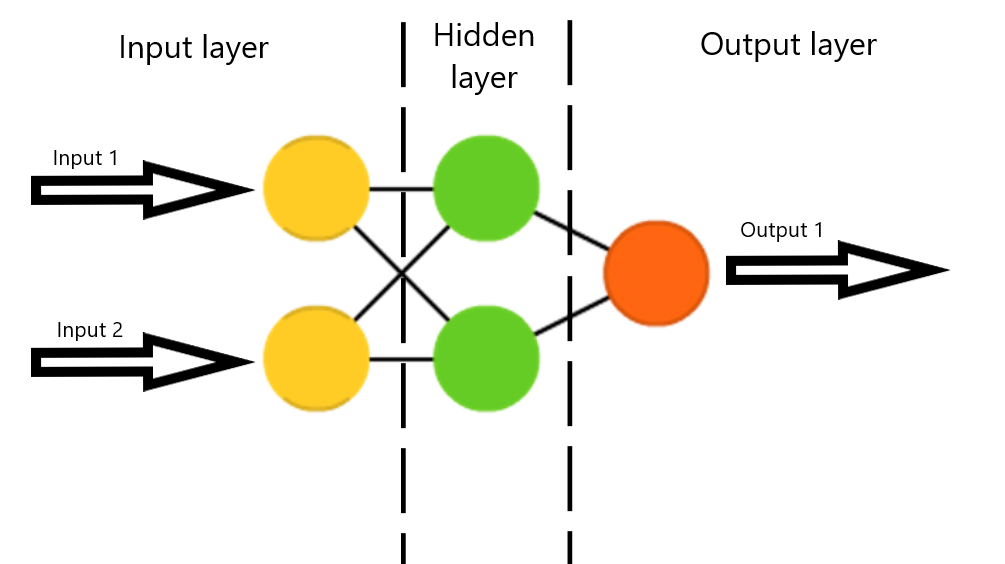

In [ ]:
# sieć dla covtype

# create NN
covtype_NN_model = Sequential()
covtype_NN_model.add(Dense(1000, input_dim=53, activation='relu'))  # the input layer
covtype_NN_model.add(Dense(100, activation='relu'))  # the first hidden layer
covtype_NN_model.add(Dense(500, activation='relu'))  # the second hidden layer
covtype_NN_model.add(Dropout(0.2))  # Protects against overfitting
covtype_NN_model.add(Dense(7, activation='softmax'))  # the output layer
covtype_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
covtype_NN_model.fit(covtype_X_train, covtype_y_train, validation_data=(covtype_X_test, covtype_y_test), batch_size=20, epochs=10, verbose=1)


# predict values from test set, measure accuracity
prediction = covtype_NN_model.predict(covtype_X_test)
length = len(prediction)
y_label = np.argmax(covtype_y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)

Epoch 1/10
23241/23241 [==============================] - 117s 5ms/step - loss: 0.8079 - accuracy: 0.6236 - val_loss: 0.7665 - val_accuracy: 0.6464
Epoch 2/10
23241/23241 [==============================] - 116s 5ms/step - loss: 0.7542 - accuracy: 0.6511 - val_loss: 0.7408 - val_accuracy: 0.6593
Epoch 3/10
23241/23241 [==============================] - 131s 6ms/step - loss: 0.7278 - accuracy: 0.6624 - val_loss: 0.7195 - val_accuracy: 0.6620
Epoch 4/10
23241/23241 [==============================] - 114s 5ms/step - loss: 0.7033 - accuracy: 0.6748 - val_loss: 0.6874 - val_accuracy: 0.6819
Epoch 5/10
23241/23241 [==============================] - 113s 5ms/step - loss: 0.6844 - accuracy: 0.6853 - val_loss: 0.6761 - val_accuracy: 0.6899
Epoch 6/10
23241/23241 [==============================] - 113s 5ms/step - loss: 0.6667 - accuracy: 0.6941 - val_loss: 0.6544 - val_accuracy: 0.6991
Epoch 7/10
23241/23241 [==============================] - 109s 5ms/step - loss: 0.6494 - accuracy: 0.7020 - val_

In [18]:
# sieć dla credit

# create NN
credit_NN_model = Sequential()
credit_NN_model.add(Dense(1000, input_dim=42, activation='relu'))  # the input layer
credit_NN_model.add(Dense(100, activation='relu'))  # the first hidden layer
credit_NN_model.add(Dropout(0.2))  # Protects against overfitting
credit_NN_model.add(Dense(2, activation='softmax'))  # the output layer
credit_NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # compile model

# train NN
credit_NN_model.fit(credit_X_train, credit_y_train, validation_data=(credit_X_test, credit_y_test), batch_size=20, epochs=10, verbose=1)

# predict values from test set, measure accuracity
credit_prediction = credit_NN_model.predict(credit_X_test)
length = len(credit_prediction)
credit_y_label = np.argmax(credit_y_test, axis=1)
credit_predict_label = np.argmax(credit_prediction, axis=1)
# how times it matched/ how many test cases
accuracy = np.sum(credit_y_label == credit_predict_label)/length * 100
print("Accuracy of the neural network:", accuracy)


Epoch 1/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6448 - accuracy: 0.6724 - val_loss: 0.5797 - val_accuracy: 0.7405
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8276 - val_loss: 0.4943 - val_accuracy: 0.7786
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8314 - val_loss: 0.4712 - val_accuracy: 0.8015
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8659 - val_loss: 0.4310 - val_accuracy: 0.8168
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8487 - val_loss: 0.3967 - val_accuracy: 0.8244
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8602 - val_loss: 0.4017 - val_accuracy: 0.8397
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8716 - val_loss: 0.3939 - val_accuracy: 0.8473
Epoch 8/10
27/27 [==

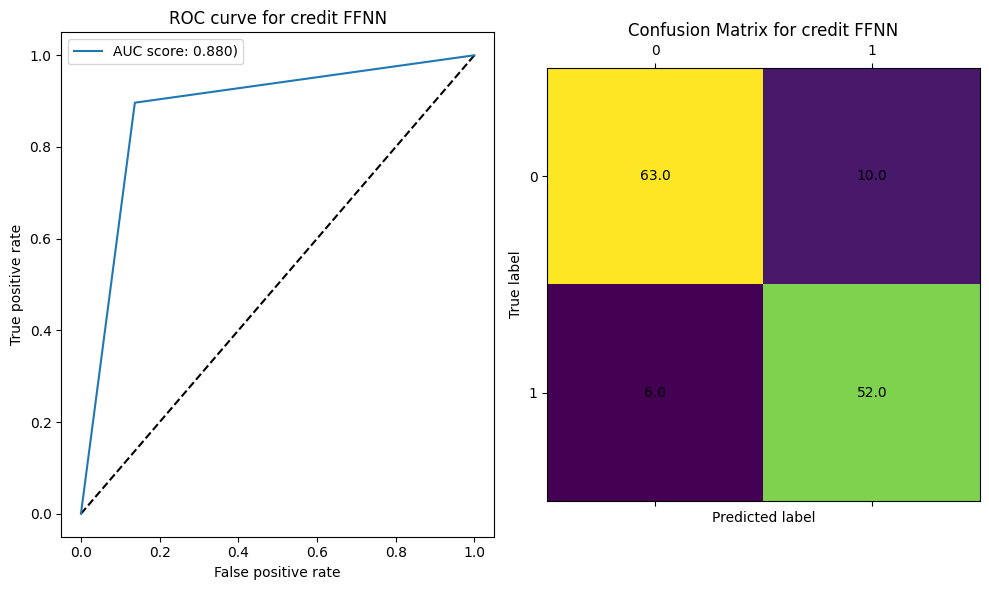

In [42]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(credit_y_label, credit_predict_label)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC score: {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for credit FFNN')
plt.legend(loc='best')

mtx = confusion_matrix(credit_y_label, credit_predict_label)
ax = plt.subplot(1, 2, 2)
ax.matshow(mtx)
for (i, j), z in np.ndenumerate(mtx):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for credit FFNN')

plt.tight_layout()
plt.show()


In [4]:
# sieć SOM dla covtype:

covtype_SOM_target = covtype_y
covtype_SOM_data = covtype_X

 # rule of thumb for SOM dimentions: 5*sqrt(samples_size), however this dataset is massive enough (almost 600k samples), that trying to create map this large crashes the runtime due to isufficient RAM
 # And all samples fit into much smaller map anyway
covtype_mapSize = 15 
print(f'creating map with width: {covtype_mapSize}')
covtype_SOM_model = MiniSom(covtype_mapSize, covtype_mapSize, covtype_SOM_data.shape[1], sigma=1.5, learning_rate=.5,
                           neighborhood_function='gaussian', random_seed=0)

# prepare and train model
covtype_SOM_model.pca_weights_init(covtype_SOM_data)
covtype_SOM_model.train(covtype_SOM_data, 1000, verbose=True)

creating map with width: 15
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.005860920980693315


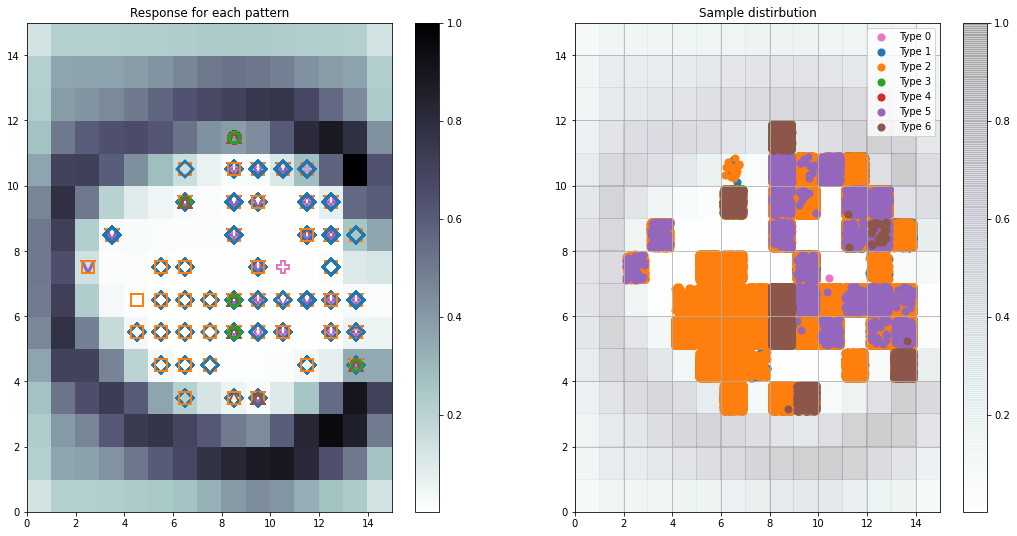

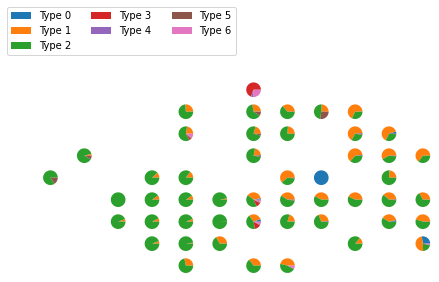

In [5]:
labels = {0: 'Type 0', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4', 5: 'Type 5', 6: 'Type 6'}
colors = ['C0', 'C1','C2','C3','C4','C5','C6']
markers = ['D', 's', 'H', "o", "v", "^", "P"]

plt.figure(figsize=(18, 9))

# The response for each pattern in the dataset - different colors and markers for each label
plt.subplot(1, 2, 1)
plt.pcolor(covtype_SOM_model.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title('Response for each pattern')
for cnt, xx in enumerate(covtype_SOM_data):
    w = covtype_SOM_model.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[covtype_SOM_target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[covtype_SOM_target[cnt]-1], markersize=12, markeredgewidth=2)


# Sample distirbution - each dot represents the coordinates of the winning neuron.
# A random offset is added to avoid overlaps between points within the same cell.
plt.subplot(1, 2, 2)
plt.title('Sample distirbution')
w_x, w_y = zip(*[covtype_SOM_model.winner(d) for d in covtype_SOM_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.pcolor(covtype_SOM_model.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(covtype_SOM_target):
    idx_target = covtype_SOM_target == c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=labels[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()


# Pie-chart distribution.
labels_map = covtype_SOM_model.labels_map(covtype_SOM_data, [labels[t] for t in covtype_SOM_target])
the_grid = gridspec.GridSpec(covtype_mapSize, covtype_mapSize,plt.figure(figsize=(9, 6)))
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in labels.values()]
    plt.subplot(the_grid[covtype_mapSize-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, labels.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()


In [11]:
# sieć SOM dla credit:

credit_SOM_target = credit_y
credit_SOM_data = credit_X

credit_mapSize = math.ceil(np.sqrt(5*np.sqrt(len(credit_SOM_target))))  # rule of thumb for SOM dimentions: 5*sqrt(samples_size)
print(f'creating map with width: {credit_mapSize}')
credit_SOM_model = MiniSom(credit_mapSize, credit_mapSize, credit_SOM_data.shape[1], sigma=1.5, learning_rate=.5,
                           neighborhood_function='gaussian', random_seed=0)

# prepare and train model
credit_SOM_model.pca_weights_init(credit_SOM_data)
credit_SOM_model.train(credit_SOM_data, 1000, verbose=True)

creating map with width: 12
 [  414 / 1000 ]  41% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:379: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.09559426229677434


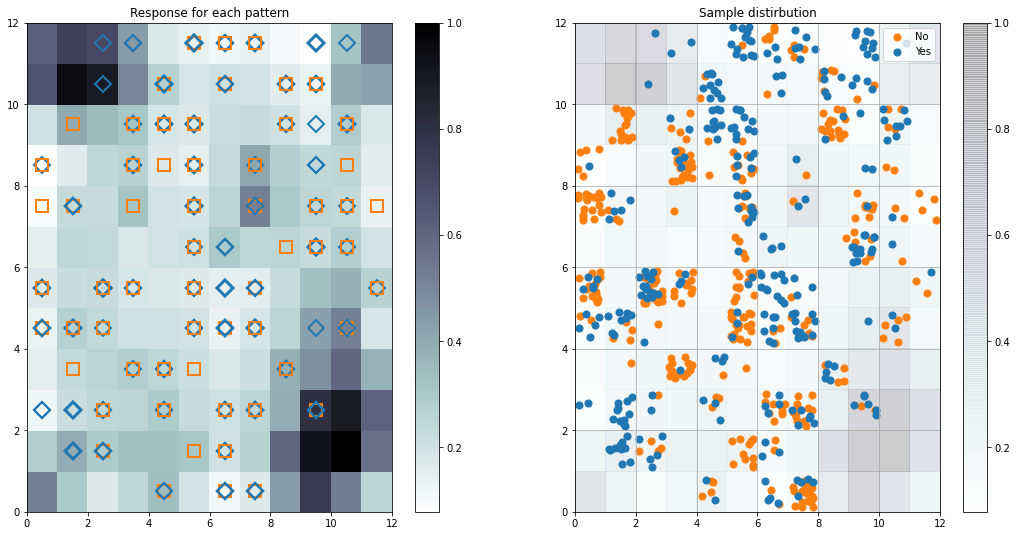

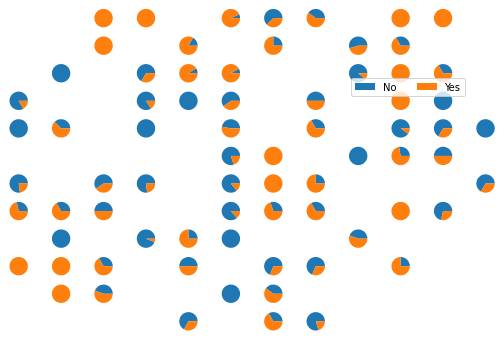

In [9]:
labels = {0: 'No', 1: 'Yes'}
colors = ['C0', 'C1']
markers = ['D', 's']

plt.figure(figsize=(18, 9))

# The response for each pattern in the dataset - different colors and markers for each label
plt.subplot(1, 2, 1)
plt.pcolor(credit_SOM_model.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title('Response for each pattern')
for cnt, xx in enumerate(credit_SOM_data):
    w = credit_SOM_model.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[credit_SOM_target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[credit_SOM_target[cnt]-1], markersize=12, markeredgewidth=2)


# Sample distirbution - each dot represents the coordinates of the winning neuron.
# A random offset is added to avoid overlaps between points within the same cell.
plt.subplot(1, 2, 2)
plt.title('Sample distirbution')
w_x, w_y = zip(*[credit_SOM_model.winner(d) for d in credit_SOM_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.pcolor(credit_SOM_model.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(credit_SOM_target):
    idx_target = credit_SOM_target == c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=labels[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()


# Pie-chart distribution.
labels_map = credit_SOM_model.labels_map(credit_SOM_data, [labels[t] for t in credit_SOM_target])
the_grid = gridspec.GridSpec(credit_mapSize, credit_mapSize,plt.figure(figsize=(9, 6)))
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in labels.values()]
    plt.subplot(the_grid[credit_mapSize-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, labels.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()
